In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
X_train = pd.read_csv(os.path.join(os.getcwd(), "data", "X_train.csv"))
X_test = pd.read_csv(os.path.join(os.getcwd(), "data", "X_test.csv"))
y_train = pd.read_csv(os.path.join(os.getcwd(), "data", "y_train.csv"))
y_test = pd.read_csv(os.path.join(os.getcwd(), "data", "y_test.csv"))

In [30]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous","last_contact_day"]
categorical_features = [col for col in X_train.columns if col not in numerical_features]

In [31]:
le = LabelEncoder()
for c in categorical_features:
    X_train[c] = le.fit_transform(X_train[c])
    X_test[c] = le.fit_transform(X_test[c])

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [33]:
y_train.value_counts() / len(y_train)

y
0    0.5
1    0.5
dtype: float64

In [34]:
X_train.shape

(4250, 15)

In [44]:
model = RandomForestClassifier(n_estimators=1000)

Accuracy: 0.83 - Precision: 0.88 - Recall: 0.29 - F1 Score: 0.44


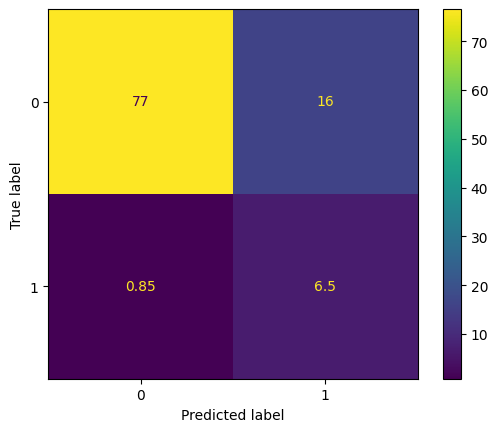

In [45]:
# Fit the classifier
model.fit(X_train, y_train.values.ravel())

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(predictions, y_test.values.ravel())
precision = precision_score(predictions, y_test.values.ravel())
recall = recall_score(predictions, y_test.values.ravel())
f1score = f1_score(predictions, y_test.values.ravel())

cm = 100 * confusion_matrix(y_test.values.ravel(), predictions, labels=model.classes_) / len(y_test.values.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

print(f"Accuracy: {accuracy:.2f} - Precision: {precision:.2f} - Recall: {recall:.2f} - F1 Score: {f1score:.2f}")
disp.plot()
plt.show()

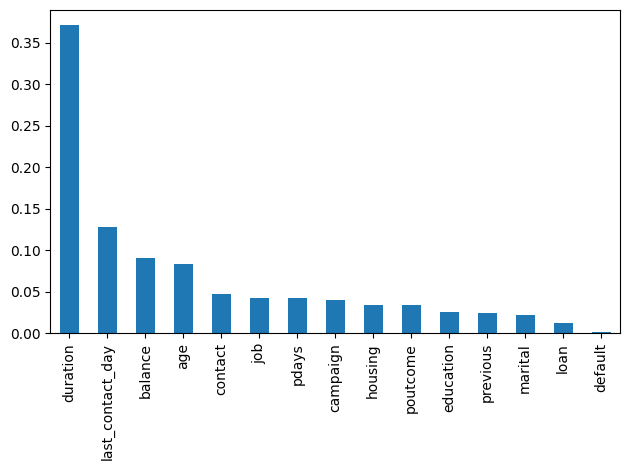

In [46]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)
fig, ax = plt.subplots()
importances.plot.bar()
fig.tight_layout()